In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


## Downloading DataSet

#### Dependencies 

In [0]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader


import math;

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from ipywidgets import interact, Dropdown, IntSlider
%matplotlib inline
plt.style.use('grayscale')

from __future__ import division
import torch
import torch.nn as nn

import numpy as np
on
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os


print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

import torchvision.models as models
from torchsummary import summary
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import PIL
from PIL import Image
from torch.autograd import Variable

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

PyTorch Version:  1.1.0
Torchvision Version:  0.3.0


## downloading the Data set Using Keras Becaue I got a problem with TORCH Datasets nd i have no time to solve it, Only used Keras for getting the Dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

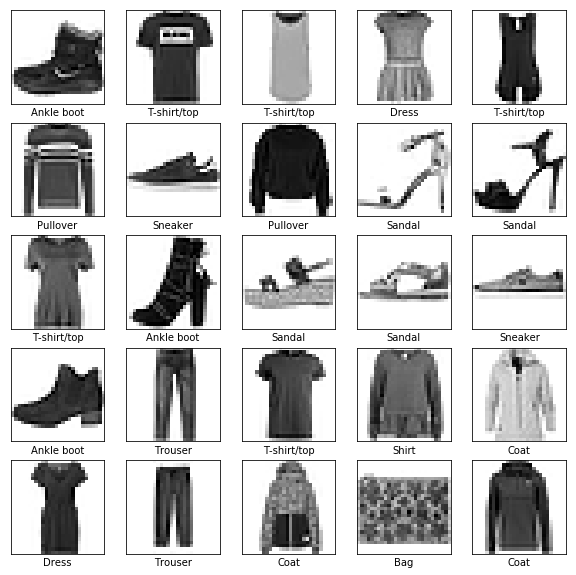

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Pre_processing 

In [0]:
normaliz = transforms.Normalize(mean=[0.5], std=[0.5])

In [0]:
train_x = torch.from_numpy(train_images)
train_y = torch.from_numpy(train_labels)
test_x = torch.from_numpy(test_images)
test_y = torch.from_numpy(test_labels)

In [0]:
import torch.utils.data as utils
from torch.utils.data.dataset import random_split

train_data = utils.TensorDataset(train_x,train_y) # create your datset


train_size = int(0.8 * len(train_data))
test_size = len(train_data) - train_size
train_dataset, validate_dataset = torch.utils.data.random_split(train_data, [train_size, test_size])

train_dataloader = utils.DataLoader(train_dataset,batch_size=100, shuffle=True) # create your dataloader
validate_dataloader =   utils.DataLoader(validate_dataset,batch_size=20, shuffle=False) # create your d


test_data =  utils.TensorDataset(test_x,test_y) # create your datset
test_dataloader = utils.DataLoader(test_data,batch_size=100, shuffle=False) # create your dataloader




## Helper functions


In [0]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## building our Model

In [0]:
class CNNModel_dropout(nn.Module):
    def __init__(self):
        super(CNNModel_dropout, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.4))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.fc = nn.Sequential(nn.Linear(7*7*32, 10))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
      
      
#instance of the Conv Net
cnn_model = CNNModel()
cnn_model.to(device)
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.01);

In [0]:
class CNNModel_batch(nn.Module):
    def __init__(self):
        super(CNNModel_batch, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
      
      
#instance of the Conv Net
cnn_model = CNNModel()
cnn_model.to(device)
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.01);

In [0]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
        nn.Dropout(0.4))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
      
      
#instance of the Conv Net
cnn_model = CNNModel()
cnn_model.to(device)
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.01);

## Functions for Training/Validation and Testing 

In [0]:

def train(model = cnn_model,batch_size=100 ,num_epochs=20, adabtive_lr = False, lr=0.01):
  train_dataloader = utils.DataLoader(train_dataset,batch_size=batch_size, shuffle=True) # create your dataloader

  validate_dataloader =   utils.DataLoader(validate_dataset,batch_size=20, shuffle=False) # create your d
  
  criterion = nn.CrossEntropyLoss();
  optimizer = torch.optim.Adam(cnn_model.parameters(), lr=lr);


  losses = []
  valid_loss = []

  train_size = len(train_dataset)
  valid_size = len(validate_dataset)
  history = []
  for epoch in range(num_epochs):
      train_correct = 0
      validation_correct = 0
      train_acc = 0
      validation_acc = 0
      val_loss = 0;
      running_loss = 0
      for i, (images, labels) in enumerate(train_dataloader):
          images = Variable(images.float())
          labels = Variable(labels)
          images = torch.reshape(images,(-1,1, 28,28))
          images = images.cuda()
          labels = labels.type(torch.LongTensor)
          labels = labels.cuda()

          #print(images.shape)
          # Forward + Backward + Optimize
          optimizer.zero_grad()
          outputs = cnn_model(images)
          outputs.cuda()
          _, predicted = torch.max(outputs.data, 1)
          train_correct += (predicted == labels).sum()

          loss = criterion(outputs, labels)
          running_loss += loss.item()

          loss.backward()
          optimizer.step()




      with torch.no_grad():    
        for images, labels in validate_dataloader:
            images = Variable(images.float())
            labels = Variable(labels)
            images = torch.reshape(images,(-1,1, 28,28))
            images = images.cuda()
            labels = labels.type(torch.LongTensor)
            labels = labels.cuda()

            outputs = cnn_model(images)
            outputs.cuda()
            optimizer.zero_grad()
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            validation_correct += (predicted == labels).sum()


      test_accu =  int(train_correct) / train_size
      valid_accu = int(validation_correct) / valid_size

      print ('Epoch [{}/{}], -T-Loss : {:.6f} , Train_accuracy: {:.4f} ,  Val_loss: {:.6f}  -Val_acc: {:.4f}'
             .format(epoch+1, num_epochs,running_loss,test_accu ,val_loss, valid_accu))
      history.append([epoch,running_loss,valid_accu,val_loss])
      
      if adabtive_lr :
        lr = lr * (0.1 *epoch )
        for param_group in optimizer.param_groups:
          param_group['lr'] = lr

   
  

  return history

#### Testing Function

In [0]:
from sklearn.metrics import classification_report
def test(cnn_model , history):
  test_dataloader = utils.DataLoader(test_data,batch_size=len(test_data), shuffle=False) # create your dataloader
  validation_correct = 0
  
  history = np.array(history)
  plt.figure()
  plt.title('Training performance')
  plt.plot(history[:,0], history[:,1], label='train loss+error')
  plt.plot(history[:,0], history[:,3], label='val_error')
  plt.legend()
 
  for images, labels in test_dataloader:
            images = Variable(images.float())
            labels = Variable(labels)
            images = torch.reshape(images,(-1,1, 28,28))
            images = images.cuda()
            labels = labels.type(torch.LongTensor)
            labels = labels.cuda()

            outputs = cnn_model(images)
            outputs.cuda()
            #print(outputs)
            _, predicted = torch.max(outputs.data, 1)
            validation_correct += (predicted == labels).sum()
            
            print(validation_correct.item())
            print("Testing Accuracy : {:.1f} %".format(100 * (validation_correct.item() / len(test_data))))
            print(classification_report(labels.cpu().numpy(),predicted.cpu().numpy()))


            conf = np.zeros([10,10])
            confnorm = np.zeros([10,10])
            for i in range(0,len(test_data)):
                  j = labels[i]
                  k = predicted[i]
                  conf[j,k] = conf[j,k] + 1
            for i in range(0,10):
                  confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
            plt.figure()
            plot_confusion_matrix(confnorm, labels=(range(0,10)), title=" Test ConvNet Confusion Matrix")


 
  


# Training

#### Model with adabtive LR



*   Adabtive learning rate = FALSE
*   Batch Size = 50
*  With bAtch normalizaiton 



In [0]:
cnn_model = CNNModel_batch()
cnn_model.to(device)
history = train(cnn_model,batch_size=50 ,num_epochs=20, adabtive_lr = False,lr=0.1)

Epoch [1/20], -T-Loss : 655.647459 , Train_accuracy: 0.7829 ,  Val_loss: 292.667942  -Val_acc: 0.8206
Epoch [2/20], -T-Loss : 462.302212 , Train_accuracy: 0.8283 ,  Val_loss: 306.568540  -Val_acc: 0.8238
Epoch [3/20], -T-Loss : 451.102714 , Train_accuracy: 0.8350 ,  Val_loss: 293.373661  -Val_acc: 0.8318
Epoch [4/20], -T-Loss : 441.961554 , Train_accuracy: 0.8400 ,  Val_loss: 252.725319  -Val_acc: 0.8497
Epoch [5/20], -T-Loss : 411.139741 , Train_accuracy: 0.8510 ,  Val_loss: 245.267723  -Val_acc: 0.8637
Epoch [6/20], -T-Loss : 404.808772 , Train_accuracy: 0.8554 ,  Val_loss: 320.844092  -Val_acc: 0.8360
Epoch [7/20], -T-Loss : 411.466370 , Train_accuracy: 0.8509 ,  Val_loss: 267.821675  -Val_acc: 0.8455
Epoch [8/20], -T-Loss : 400.140206 , Train_accuracy: 0.8569 ,  Val_loss: 302.003318  -Val_acc: 0.8198
Epoch [9/20], -T-Loss : 400.159184 , Train_accuracy: 0.8562 ,  Val_loss: 268.481584  -Val_acc: 0.8427
Epoch [10/20], -T-Loss : 385.963103 , Train_accuracy: 0.8593 ,  Val_loss: 242.4606

### Testing

8876
Testing Accuracy : 88.8 %
              precision    recall  f1-score   support

           0       0.91      0.76      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.86      0.92      0.89      1000
           4       0.86      0.78      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.66      0.76      0.71      1000
           7       0.96      0.93      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



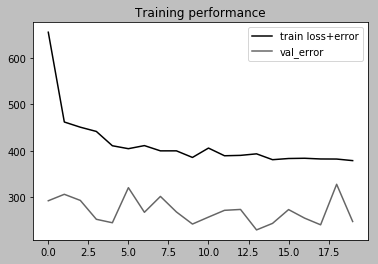

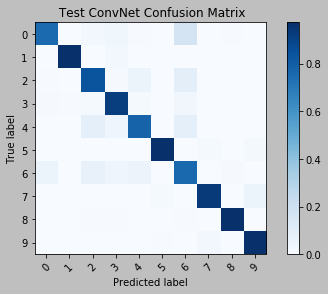

In [0]:
test(cnn_model, history)

#### Now let the batch size = 100

In [0]:
cnn_model = CNNModel_batch()
cnn_model.to(device)
history_b_100 = train(cnn_model,batch_size=100 ,num_epochs=20, adabtive_lr = False,lr=0.01)

Epoch [1/20], -T-Loss : 212.329598 , Train_accuracy: 0.8428 ,  Val_loss: 208.284814  -Val_acc: 0.8722
Epoch [2/20], -T-Loss : 142.797792 , Train_accuracy: 0.8929 ,  Val_loss: 171.439001  -Val_acc: 0.8961
Epoch [3/20], -T-Loss : 126.811458 , Train_accuracy: 0.9040 ,  Val_loss: 170.694739  -Val_acc: 0.8947
Epoch [4/20], -T-Loss : 116.513428 , Train_accuracy: 0.9120 ,  Val_loss: 174.364960  -Val_acc: 0.8938
Epoch [5/20], -T-Loss : 108.270350 , Train_accuracy: 0.9177 ,  Val_loss: 157.488705  -Val_acc: 0.9041
Epoch [6/20], -T-Loss : 102.382899 , Train_accuracy: 0.9222 ,  Val_loss: 159.770024  -Val_acc: 0.9052
Epoch [7/20], -T-Loss : 95.218419 , Train_accuracy: 0.9277 ,  Val_loss: 162.096186  -Val_acc: 0.9067
Epoch [8/20], -T-Loss : 92.847983 , Train_accuracy: 0.9293 ,  Val_loss: 172.948833  -Val_acc: 0.8992
Epoch [9/20], -T-Loss : 87.641498 , Train_accuracy: 0.9325 ,  Val_loss: 161.467346  -Val_acc: 0.9084
Epoch [10/20], -T-Loss : 83.434184 , Train_accuracy: 0.9354 ,  Val_loss: 174.570770  

#### Testing

8832
Testing Accuracy : 88.3 %
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.85      0.92      0.88      1000
           4       0.84      0.76      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.65      0.74      0.70      1000
           7       0.96      0.93      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



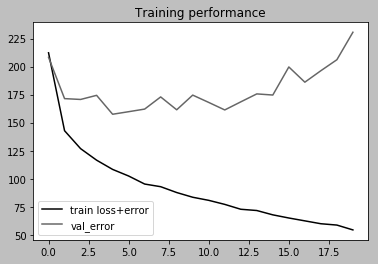

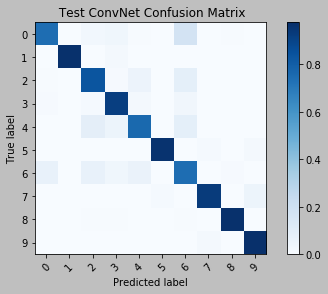

In [0]:
test(cnn_model,history_b_100)

### Model with Batch normalization and Dropout

In [0]:
cnn_model = CNNModel()
cnn_model.to(device)
history_model = train(cnn_model,batch_size=100 ,num_epochs=20, adabtive_lr = False,lr=0.01)

Epoch [1/20], -T-Loss : 234.862366 , Train_accuracy: 0.8262 ,  Val_loss: 232.241227  -Val_acc: 0.8573
Epoch [2/20], -T-Loss : 167.355932 , Train_accuracy: 0.8746 ,  Val_loss: 200.380107  -Val_acc: 0.8792
Epoch [3/20], -T-Loss : 152.381642 , Train_accuracy: 0.8847 ,  Val_loss: 212.164368  -Val_acc: 0.8685
Epoch [4/20], -T-Loss : 144.138718 , Train_accuracy: 0.8911 ,  Val_loss: 187.340443  -Val_acc: 0.8835
Epoch [5/20], -T-Loss : 137.724158 , Train_accuracy: 0.8954 ,  Val_loss: 190.305024  -Val_acc: 0.8857
Epoch [6/20], -T-Loss : 134.551368 , Train_accuracy: 0.8980 ,  Val_loss: 182.874229  -Val_acc: 0.8905
Epoch [7/20], -T-Loss : 132.306174 , Train_accuracy: 0.8997 ,  Val_loss: 193.917963  -Val_acc: 0.8802
Epoch [8/20], -T-Loss : 128.216939 , Train_accuracy: 0.9017 ,  Val_loss: 177.457416  -Val_acc: 0.8928
Epoch [9/20], -T-Loss : 126.671842 , Train_accuracy: 0.9049 ,  Val_loss: 183.944346  -Val_acc: 0.8908
Epoch [10/20], -T-Loss : 124.921306 , Train_accuracy: 0.9051 ,  Val_loss: 176.8092

8876
Testing Accuracy : 88.8 %
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.84      0.83      1000
           3       0.85      0.93      0.89      1000
           4       0.86      0.77      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.65      0.77      0.71      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



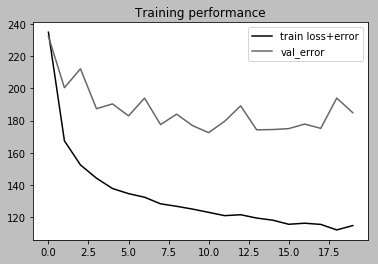

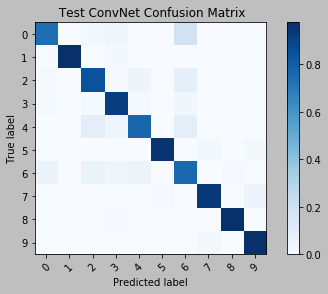

In [0]:
test(cnn_model,history_model)